**Upload Dataset**

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving insurance.csv to insurance.csv
User uploaded file "insurance.csv" with length 55628 bytes


**Loading Data**

In [32]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['insurance.csv'].decode("utf-8")))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
print("The Regions in Dataset are",df['region'].unique())
print("The Gender in Dataset are",df['sex'].unique())
print("The Smoker Options in Dataset are",df['smoker'].unique())

The Regions in Dataset are ['southwest' 'southeast' 'northwest' 'northeast']
The Gender in Dataset are ['female' 'male']
The Smoker Options in Dataset are ['yes' 'no']


**On Hot Encoding**

In [36]:
data = pd.get_dummies(df)
names = data.columns

In [38]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


**Visualization**

Text(0.5, 1.0, 'Between Age and Charges')

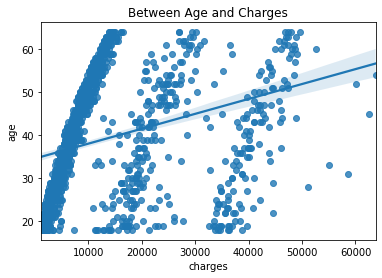

In [39]:
import seaborn as sns

sns.regplot(x = 'charges', y = 'age', data = df).set_title("Between Age and Charges")

As You See That Due to Not Scailing of Dataset it is not accurate and UnderFitted.

**Preprocessing**

In [40]:
from sklearn.preprocessing import MinMaxScaler

mn_sc = MinMaxScaler()

data_mn = mn_sc.fit_transform(data)

data_s = pd.DataFrame(data_mn, columns = names)

In [41]:
data_s.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


**Now Let's Viualize**

Text(0.5, 1.0, 'Between Age and Charges')

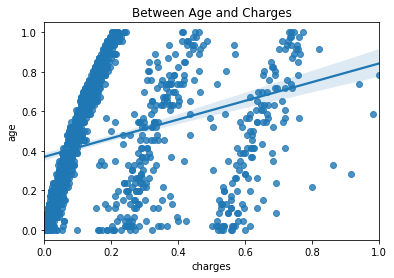

In [42]:
import seaborn as sns

sns.regplot(x = 'charges', y = 'age', data = data_s).set_title("Between Age and Charges")

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data_sc = sc.fit_transform(data)

data_b = pd.DataFrame(data_sc, columns = names)

In [45]:
data_b.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,1.010519,-1.010519,-1.970587,1.970587,-0.565267,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,-0.989591,0.989591,0.507463,-0.507463,-0.565267,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,-0.989591,0.989591,0.507463,-0.507463,-0.565267,1.765481,-0.611324,-0.566418


Text(0.5, 1.0, 'Between Age and Charges')

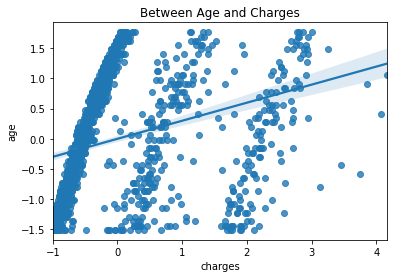

In [44]:
import seaborn as sns

sns.regplot(x = 'charges', y = 'age', data = data_b).set_title("Between Age and Charges")

**Lets First Implement Linear Regression with SkLearn**

In [48]:
X = data.drop("charges", axis = 1).values
Y = data['charges'].values

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 0)


sc = StandardScaler()

std_x_train = sc.fit_transform(X_train)
std_x_test = sc.fit_transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = lr.predict(X_test)

In [55]:
mean_squared_error(y_pred, y_test)

34577221.797758825

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = data_b.drop("charges", axis = 1).values
Y = data_b['charges'].values

x_train, x_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 0)


l = LinearRegression()

In [63]:
l.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_pred = l.predict(x_test)

In [68]:
mean_squared_error(y_pred,Y_test)

0.2360306585925546

In [69]:
# Now you can see the difference
# At first 34577221.797758825
# After Scailing 0.2360306585925546

**Keras ANN**

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [73]:
from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()

data_mn_2 = mn.fit_transform(data)

data_2 = pd.DataFrame(data_mn_2, columns = names)

In [74]:
data_2.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [86]:
X = data_2.drop("charges", axis = 1)
Y = data_2['charges']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 0)



In [78]:
len(X.columns)

11

In [87]:
model = Sequential()

model.add(
    Dense(round(len(data_2.columns) / 2), input_dim = 11, activation = "relu")
)
model.add(
    Dense(round(len(data_2.columns) / 2), activation = "relu")
)
model.add(
    Dense(1, activation = "linear")
)

model.compile(optimizer="Adam", loss="mean_squared_error",metrics=['accuracy'])

In [89]:
model.fit(X_train,Y_train, batch_size = 200, epochs = 700)

Epoch 1/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.0017
Epoch 2/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.0017
Epoch 3/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.0017
Epoch 4/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.0017
Epoch 5/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.0017
Epoch 6/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.0017
Epoch 7/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.0017
Epoch 8/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.0017
Epoch 9/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.0017
Epoch 10/700
7/7 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.0017
Epoch 11/700
7/7 [===========

In [90]:
y_pred = model.predict(X_test)

In [95]:
eva = model.evaluate(X_test,Y_test,verbose = 0)

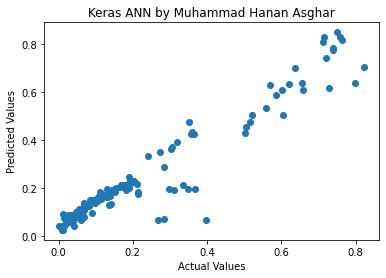

In [99]:
import matplotlib.pyplot as plt


plt.scatter(Y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Keras ANN by Muhammad Hanan Asghar")
plt.show()

**Yeah Huhuhuhuhuhu Finally i made the most accurate model**

Text(0.5, 1.0, 'Regression Plot')

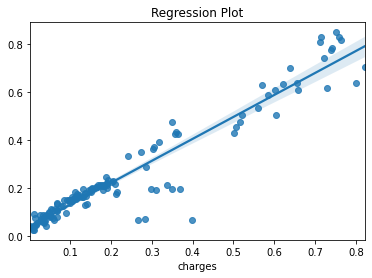

In [100]:
# Hidding Warnings
import warnings
warnings.filterwarnings('ignore')
sns.regplot(Y_test, y_pred).set_title("Regression Plot")